1. Create a `data` folder in your local project repository.  
2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look at the top and bottom, do you notice anything?
        Value Footnotes are missing?

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look at the top and bottom, do you notice anything?
        It contains a footnote index?

## 2a. Value Footnotes are blank for all rows
## 2b. Contains footnote index

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.

  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [7]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?


In [9]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


## 5a. 7662 rows x 4 columns

In [11]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

## 5b. object, int64, float64, float64

In [13]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [15]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [16]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?


In [19]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [20]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [21]:
gdp_df_country_count = gdp_df.Country.value_counts()
gdp_df_country_count = gdp_df_country_count.to_frame()
print(gdp_df_country_count.to_string())

                                                    count
Country                                                  
Least developed countries: UN classification           33
Middle East & North Africa                             33
Middle East & North Africa (IDA & IBRD)                33
Middle income                                          33
Mongolia                                               33
Morocco                                                33
Mozambique                                             33
Myanmar                                                33
Namibia                                                33
Nepal                                                  33
Netherlands                                            33
New Zealand                                            33
Nicaragua                                              33
Niger                                                  33
Nigeria                                                33
North America 

## 7a. 207.
## 7b. All countries with less than 33 year_count have missing years. (I want to figure out how to exclude those countries with 33 year_count.)
## 7c. It rose pretty consistently until 2013.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

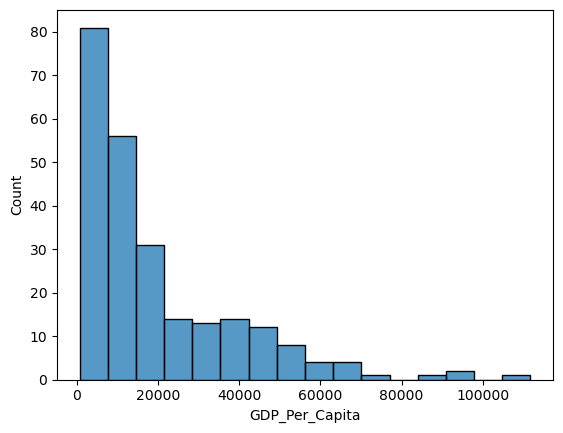

In [24]:
sns.histplot(data=gdp_df, x=gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

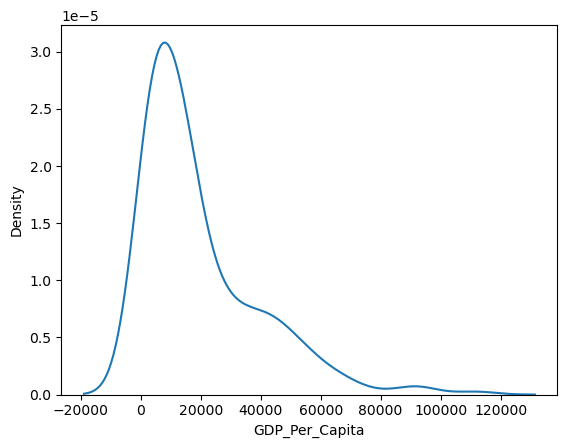

In [25]:
sns.kdeplot(data=gdp_df, x=gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

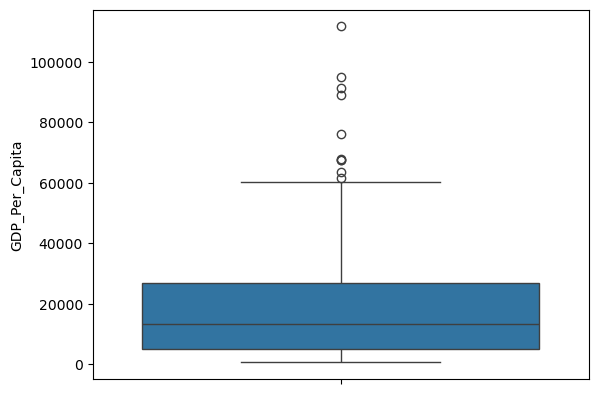

In [26]:
sns.boxplot(y=gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

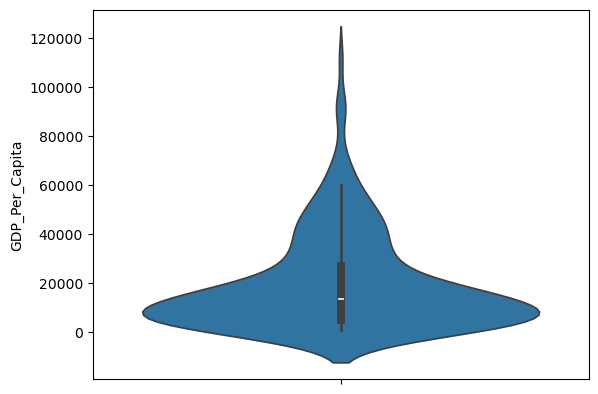

In [27]:
sns.violinplot(y=gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

## 8a. Majority of countries have a GDP Per Capita of less than 20,000.
## 8b. The charts all return similar data, but I like how obvious the boxplot shows the outliers. Histogram would be my second choice for displaying outliers in an obvious way.

9. What was the median GDP per capita value in 2020?

In [30]:
gdp_df_2020 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020]
gdp_df_2020.median()

13357.997573370474

In [31]:
gdp_df_2020.describe()

count       242.000000
mean      19586.754446
std       19640.401631
min         711.355263
25%        4961.408532
50%       13357.997573
75%       27064.125293
max      111751.314751
Name: GDP_Per_Capita, dtype: float64

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [33]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020)]

In [34]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


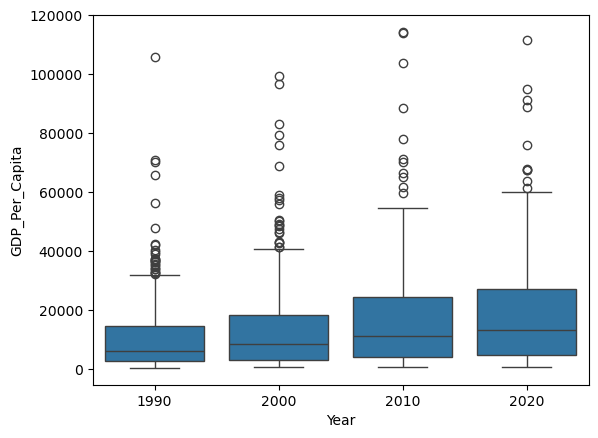

In [35]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

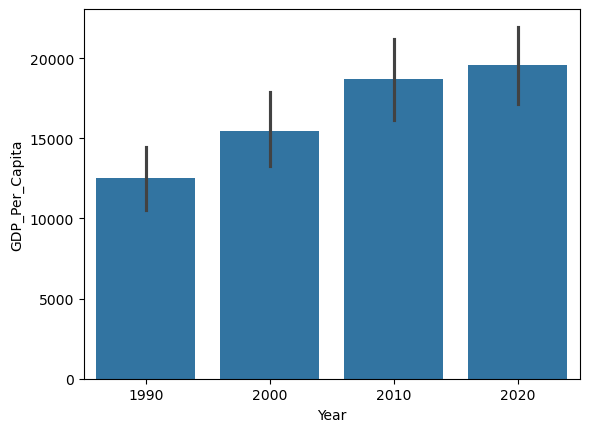

In [36]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

Text(0.5, 1.0, 'GDP Per Capita each Decade')

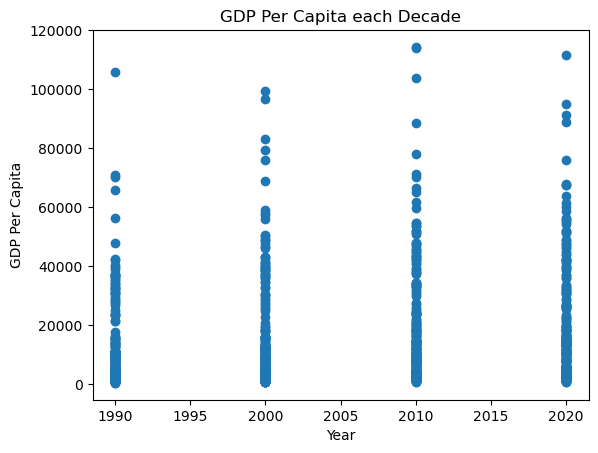

In [37]:
plt.scatter(x='Year', y='GDP_Per_Capita', data = gdp_decades)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita each Decade')

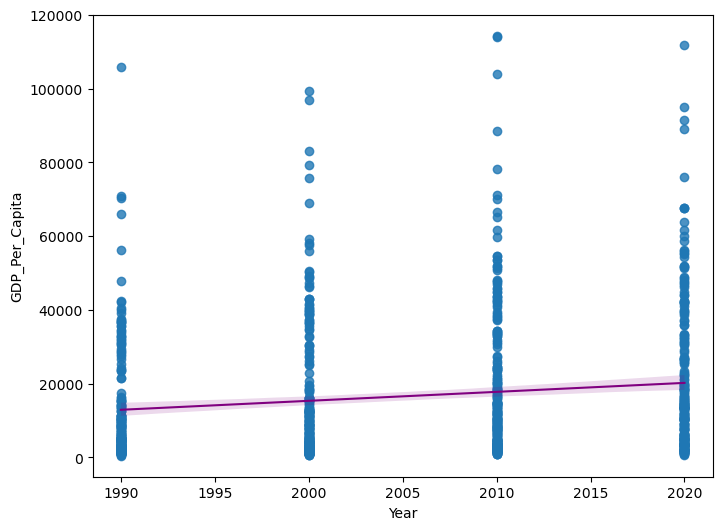

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
    line_kws={'color': 'purple', 'linewidth': 1.5},
    ax=ax)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [40]:
first_gdp_over_100000 = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]
first_gdp_over_100000.sort_values(by='Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [42]:
hghst_gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
hghst_gdp_2020.sort_values(by='GDP_Per_Capita', ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


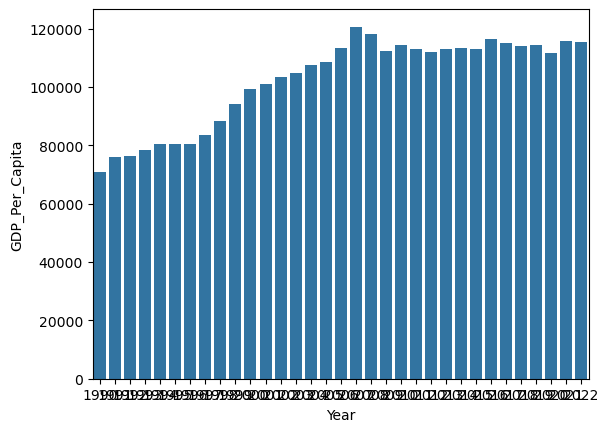

In [43]:
luxembourg = gdp_df.loc[gdp_df.Country == 'Luxembourg']
sns.barplot(x=luxembourg["Year"], y=luxembourg["GDP_Per_Capita"])
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [45]:
hghst_gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
hghst_gdp_2020.sort_values(by='GDP_Per_Capita').head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


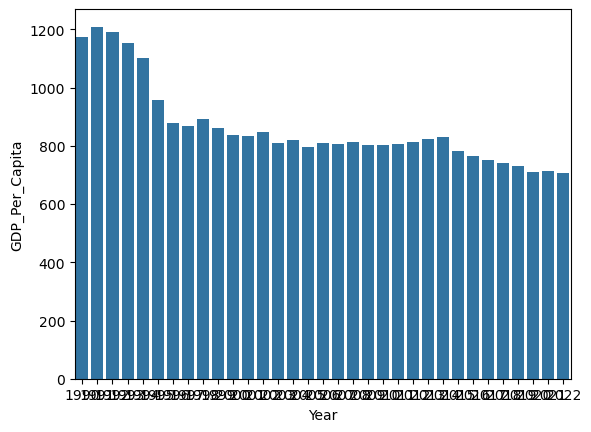

In [46]:
burundi = gdp_df.loc[gdp_df.Country == 'Burundi']
sns.barplot(x=burundi["Year"], y=burundi["GDP_Per_Capita"])
plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [48]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [49]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object